In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv('parks.csv')
df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
Park Code    56 non-null object
Park Name    56 non-null object
State        56 non-null object
Acres        56 non-null int64
Latitude     56 non-null float64
Longitude    56 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [5]:
df.describe()

,Acres,Latitude,Longitude
count,5.600000e+01,56.000000,56.000000
mean,9.279291e+05,41.233929,-113.234821
std,1.709258e+06,10.908831,22.440287
min,5.550000e+03,19.380000,-159.280000
25%,6.901050e+04,35.527500,-121.570000
50%,2.387645e+05,38.550000,-110.985000
75%,8.173602e+05,46.880000,-103.400000
max,8.323148e+06,67.780000,-68.210000


In [7]:
df.isnull().sum()

Park Code    0
Park Name    0
State        0
Acres        0
Latitude     0
Longitude    0
dtype: int64

In [8]:
df['Park Name'].value_counts()

Sequoia and Kings Canyon National Parks           1
Isle Royale National Park                         1
Hot Springs National Park                         1
Channel Islands National Park                     1
Wrangell - St Elias National Park and Preserve    1
Carlsbad Caverns National Park                    1
Dry Tortugas National Park                        1
Crater Lake National Park                         1
Mesa Verde National Park                          1
Great Sand Dunes National Park and Preserve       1
Biscayne National Park                            1
Wind Cave National Park                           1
Black Canyon of the Gunnison National Park        1
Bryce Canyon National Park                        1
Rocky Mountain National Park                      1
Arches National Park                              1
Hawaii Volcanoes National Park                    1
Great Basin National Park                         1
Lake Clark National Park and Preserve             1
Capitol Reef

In [23]:
pip install plotly --upgrade 

     |████████████████████████████████| 7.3MB 3.2MB/s eta 0:00:01
  Found existing installation: plotly 4.3.0
    Uninstalling plotly-4.3.0:
      Successfully uninstalled plotly-4.3.0
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install chart-studio

     |████████████████████████████████| 81kB 1.7MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [12]:
conda install basemap

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/thoashook/opt/anaconda3

  added / updated specs:
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-1.2.0              |   py37h0acbc05_0        14.4 MB
    conda-4.8.1                |           py37_0         2.8 MB
    geos-3.6.2                 |       h5470d99_2         1.1 MB
    proj4-5.2.0                |       h0a44026_1         6.6 MB
    pyproj-1.9.6               |   py37h9c430a6_0          58 KB
    pyshp-2.1.0                |             py_0          34 KB
    ------------------------------------------------------------
                                           Total:        25.0 MB

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'

In [5]:

# Extract the data we're interested in
lat = df['Latitude'].values
lon = df['Longitude'].values
P_names = df['Park Name'].values
area = df['Acres'].values

In [6]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat= lat, lon=lon,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter park data, with color reflecting names
# and area reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

NameError: name 'Basemap' is not defined

<Figure size 576x576 with 0 Axes>

In [ ]:
from mpl_toolkits.basemap import Basemap
imort matplotlib.pyplot as plt
%matplotlib inline
m = Basemap

In [3]:
import chart_studio.plotly

In [15]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('parks.csv')
fig = px.choropleth(df, locations="Park Name",
                    color="State", # lifeExp is a column of gapminder
                    hover_name="Acres", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [16]:
df2 = pd.read_csv('species.csv')
df2.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 14 columns):
Species ID             119248 non-null object
Park Name              119248 non-null object
Category               119248 non-null object
Order                  117776 non-null object
Family                 117736 non-null object
Scientific Name        119248 non-null object
Common Names           119248 non-null object
Record Status          119248 non-null object
Occurrence             99106 non-null object
Nativeness             94203 non-null object
Abundance              76306 non-null object
Seasonality            20157 non-null object
Conservation Status    4718 non-null object
Unnamed: 13            5 non-null object
dtypes: object(14)
memory usage: 12.7+ MB


In [12]:
df2.isnull().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

ValueError: Must pass DataFrame with boolean values only

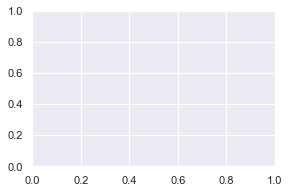

In [21]:
# plot features data distribution
fig=plt.figure(figsize=(20,20))
columns_list = [df2.loc[1:]]
# Create for loop to navigate through the column list
for i, feature in enumerate(columns_list):
    ax=fig.add_subplot(6,4,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
    ax.set_title(feature+" Distribution", color='DarkRed')
        
fig.tight_layout()  
plt.show()